In [212]:
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Gather

In [213]:
twitter_dog = pd.read_csv('twitter-archive-enhanced.csv')
twitter_dog.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [214]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
print(response)

with open('image_predictions.tsv',mode = 'wb') as file :
    file.write(response.content)

<Response [200]>


In [215]:
image_pred = pd.read_csv('image_predictions.tsv',sep = '\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [216]:
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_dog.tweet_id.values
len(tweet_ids)

2356

In [217]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [218]:
tweet_id_list = []
retweet_count_list = []
favorite_count_list = []
with open('tweet-json.txt',mode = 'r') as file :
    count = 0
    while True :
        line = file.readline()
        if not line :
            break
        
        json_data = json.loads(line)
        tweet_id_list.append(json_data['id_str'])
        retweet_count_list.append(json_data['retweet_count'])
        favorite_count_list.append(json_data['favorite_count'])

twitter_api = pd.DataFrame({'tweet_id' : tweet_id_list,
                            'retweet_count' : retweet_count_list,
                           'favorite_count' : favorite_count_list})
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess

### `twitter_dog` table

In [219]:
twitter_dog.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
656,791780927877898241,NaN,NaN,2016-10-27 23:17:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maddie. She gets some w...,7.467577e+17,4.196984e+09,2016-06-25 17:31:25 +0000,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/...",11,10,Maddie,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11,10,Oliver,None,None,None,None
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,None,None,None,None
1937,673919437611909120,NaN,NaN,2015-12-07 17:38:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obie. He is on guard watching for evil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673919437...,11,10,Obie,None,None,pupper,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,None,None
339,832273440279240704,NaN,NaN,2017-02-16 17:00:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,14,10,Smiley,doggo,None,None,None
1344,704499785726889984,NaN,NaN,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704499785...,12,10,None,None,None,None,None


- I think in_reply and tweeted columns aren't necessary.

In [220]:
twitter_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- timestamp should be datetime and tweet_id should be string

In [221]:
twitter_dog.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

- Some observations in the name column have incorrect names (such as one, not, a, 0, very, an etc.)
- Null are represented as None in name columns

In [222]:
twitter_dog.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [223]:
twitter_dog.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [224]:
twitter_dog.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [225]:
twitter_dog.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [226]:
twitter_dog.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [227]:
twitter_dog.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

- Some dogs are not classified and represent in None (doggo, floofer, pupper and puppo columns)

In [228]:
twitter_dog[(twitter_dog.doggo != 'None')&(twitter_dog.floofer != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [229]:
twitter_dog[(twitter_dog.doggo != 'None')&(twitter_dog.pupper != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [230]:
twitter_dog[(twitter_dog.doggo != 'None')&(twitter_dog.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [231]:
twitter_dog[(twitter_dog.floofer != 'None')&(twitter_dog.pupper != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [232]:
twitter_dog[(twitter_dog.floofer != 'None')&(twitter_dog.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [233]:
twitter_dog[(twitter_dog.pupper != 'None')&(twitter_dog.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [234]:
twitter_dog[(twitter_dog.doggo != 'None')&(twitter_dog.floofer != 'None')\
           &(twitter_dog.pupper != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [235]:
twitter_dog[(twitter_dog.doggo != 'None')&(twitter_dog.floofer != 'None')\
           &(twitter_dog.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [236]:
twitter_dog[(twitter_dog.puppo != 'None')&(twitter_dog.floofer != 'None')\
           &(twitter_dog.pupper != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- Some dogs are classified in 2 dog stages

In [237]:
twitter_dog.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [238]:
twitter_dog.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [239]:
(twitter_dog.rating_numerator/twitter_dog.rating_denominator).value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
inf             1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
dtype: int64

- Some rating fraction (both numerator and denominator) are incorrect such as rating denominator = 0

In [240]:
twitter_dog[twitter_dog.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### `image_pred` table

In [241]:
image_pred.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1260,748705597323898880,https://pbs.twimg.com/ext_tw_video_thumb/74870...,1,tiger_shark,0.548497,False,great_white_shark,0.130252,False,scuba_diver,0.121887,False
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False
1206,742150209887731712,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1,Siamese_cat,0.112413,False,French_bulldog,0.071414,True,hog,0.062465,False
405,673707060090052608,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True
1648,808838249661788160,https://pbs.twimg.com/media/CzmSFlKUAAAQOjP.jpg,1,Rottweiler,0.369530,True,miniature_pinscher,0.194867,True,kelpie,0.160104,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
1978,870656317836468226,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,4,Pembroke,0.945495,True,Cardigan,0.045875,True,beagle,0.004329,True
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True


- I think imag_num column isn’t necessary

In [242]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- twitter_id should be string

In [243]:
image_pred[image_pred.jpg_url.duplicated() & image_pred.img_num.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [244]:
image_pred[image_pred.jpg_url ==  'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


- Duplicated row in jpg_url with different tweet_id

In [245]:
image_pred.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

- Prediction sometimes lower sometimes capitalize

### `twitter_api` table

In [250]:
twitter_api.sample(30)

,tweet_id,retweet_count,favorite_count
315,834931633769889797,1878,11838
1575,687399393394311168,702,2081
1059,741303864243200000,3650,9631
701,786036967502913536,8237,0
825,769212283578875904,1969,5980
524,809084759137812480,4046,14685
1832,676121918416756736,1297,2335
295,837366284874571778,6005,23074
1207,715696743237730304,1454,4257
211,851861385021730816,23,0


In [251]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [252]:
twitter_api.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [253]:
twitter_dog.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1490,692901601640583168,NaN,NaN,2016-01-29 02:46:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692901601...,10,10,None,None,None,None,None
2105,670474236058800128,NaN,NaN,2015-11-28 05:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Great teeth. Nice horn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670474236...,10,10,None,None,None,None,None
162,860524505164394496,NaN,NaN,2017-05-05 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,None,None,None,None
1870,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,12,10,None,None,None,None,None
1541,689623661272240129,NaN,NaN,2016-01-20 01:41:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,None,None,pupper,None
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Duke. He's an Urban Parmesan. They know h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None
868,761750502866649088,NaN,NaN,2016-08-06 02:27:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Tristan do not speak to me wit...",6.853251e+17,4.196984e+09,2016-01-08 05:00:14 +0000,https://twitter.com/dog_rates/status/685325112...,10,10,None,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None
1585,686947101016735744,NaN,NaN,2016-01-12 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. He was specifically told not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686947101...,11,10,Jackson,None,None,None,None


In [254]:
image_pred.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,1,Lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
1338,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
507,676089483918516224,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,1,bull_mastiff,0.743808,True,boxer,0.106697,True,American_Staffordshire_terrier,0.042335,True
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,Siberian_husky,0.304902,True,Eskimo_dog,0.155147,True,malamute,0.050942,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
1499,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,Lakeland_terrier,0.265659,True,golden_retriever,0.196414,True,standard_poodle,0.133534,True


In [255]:
twitter_api.sample(30)

,tweet_id,retweet_count,favorite_count
130,867051520902168576,8425,33420
933,753398408988139520,2186,6384
1328,705786532653883392,596,2132
1077,739238157791694849,52360,75163
1546,689275259254616065,285,1273
1653,683391852557561860,2702,8356
717,783466772167098368,2608,9468
812,771102124360998913,1663,6898
1306,707297311098011648,903,3022
1292,707995814724026368,1273,3385


##### checking for `tweet_id` in `twitter_dog` `twitter_api` and `image_pred` tables

In [256]:
tweetID_twitter_dog = [i for i in twitter_dog.tweet_id.astype('str').unique()]

for i in range(len(twitter_api)) :
    if twitter_api.tweet_id.iloc[i] not in tweetID_twitter_dog :
        print(twitter_api.tweet_id.iloc[i])

In [257]:
tweetID_twitter_api = [i for i in twitter_api.tweet_id.unique()]

for i in range(len(twitter_dog)) :
    if twitter_dog.tweet_id.astype('str').iloc[i] not in tweetID_twitter_api :
        print(twitter_dog.tweet_id.iloc[i])

888202515573088257
771004394259247104


In [258]:
tweetID_image_pred = [i for i in image_pred.tweet_id.astype('str').unique()]
count = 0
for i in range(len(twitter_dog)) :
    if twitter_dog.tweet_id.astype('str').iloc[i] not in tweetID_image_pred :
        print(twitter_dog.tweet_id.iloc[i])
        count +=1
print(count)

886267009285017600
886054160059072513
885518971528720385
884247878851493888
881633300179243008
879674319642796034
879130579576475649
878604707211726852
878404777348136964
878316110768087041
876537666061221889
875097192612077568
874434818259525634
873337748698140672
872668790621863937
871166179821445120
871102520638267392
870726314365509632
869988702071779329
868639477480148993
866816280283807744
866720684873056260
866094527597207552
863471782782697472
863427515083354112
860981674716409858
860177593139703809
858860390427611136
857214891891077121
857062103051644929
856602993587888130
856330835276025856
856288084350160898
855862651834028034
855860136149123072
855857698524602368
855818117272018944
855245323840757760
855138241867124737
852936405516943360
850333567704068097
849668094696017920
848213670039564288
847978865427394560
847617282490613760
846505985330044928
846139713627017216
845459076796616705
845098359547420673
843981021012017153
841320156043304961
840761248237133825
840728873075

- Checking for lost tweet_id(when convert to int, may be str 0 will lost etc.) but luckily we don't have lost.

#### Quality
##### `twitter_dog` table 
- tweeted and in_reply columns aren't necessary.
- Erroneous datatypes (tweet_id, timestamp)
- Null represented as None (type str) in name column
- some observations in name column have incorrected name (such as one, not, a, O, very, an etc.)
- some dogs are not classified and represent in None (doggo floofer pupper puppo columns)
- some dogs are classified in 2 dog stages
- some rating fration (both numerator and denominator) are incorrect such as denominator = 0 and it cause rating calculation(numerator divide by denominator) is incorrect

##### `image_pred` table
- imag_num aren't necessary
- Erroneous datatypes (tweet_id)
- duplicated row in jpg_url with different tweet_id
- prediction sometimes lower sometimes capitalize

##### `twitter_df` table (main dataframe after merge twitter_dog, image_pred and twitter_api together)
- replace None in dog_stage column to NaN

#### Tidiness
- dog stages (doggo floofer pupper puppo) should be in one column
- `twitter_dog` table should be merge with `twitter_api` table (tweet_id 888202515573088257 and 771004394259247104 in twitter_dog not in twitter_api table) and `image_pred` table (281 tweet_id in twitter_dog not in image_pred)
- `twitter_df` should contain only breed types and the confident.

## Clean

In [259]:
twitter_dog_clean = twitter_dog.copy()
image_pred_clean = image_pred.copy()
twitter_api_clean = twitter_api.copy()

### Quality : `twitter_dog` table

#### tweeted, in_reply and expanded_urls columns aren't necessary.

##### Define
drop tweeted and in_reply columns in twitter_dog_clean table

##### Clean

In [260]:
twitter_dog_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                        'retweeted_status_id','retweeted_status_user_id',
                       'retweeted_status_timestamp','expanded_urls'],axis=1,inplace=True)

##### Test

In [261]:
twitter_dog_clean.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


#### Erroneous datatypes (tweet_id, timestamp)

##### Define
- for tweet_id column, we lucky that the start digit isn't zero so the data is correct and we will change type to string by using .astype('str')
- for timestamp, we will use pd.to_datetime to change string type to datetime type

##### Clean

In [262]:
twitter_dog_clean.tweet_id = twitter_dog_clean.tweet_id.astype('str')
twitter_dog_clean['timestamp'] = pd.to_datetime(twitter_dog_clean['timestamp'],
                                               format = '%Y-%m-%d %H:%M:%S %z')

##### Test

In [263]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 202.6+ KB


#### Null represented as None (type str) in name column

##### Define
Using .replace() to replace None to np.nan

##### Clean

In [264]:
twitter_dog_clean['name'] = twitter_dog_clean['name'].replace('None',np.nan)

##### Test

In [265]:
for i in range(len(twitter_dog_clean)) :
    assert twitter_dog_clean.name.iloc[i] != 'None'

#### some dogs are not classified and represent in None (doggo floofer pupper puppo columns)

##### Define
- Create None column to represent the data that aren't classify to any dog_stage
- Using .replace() to replace None to np.nan

In [266]:
twitter_dog_clean.iloc[0].doggo

'None'

##### Clean

In [267]:
none_list = []
for i in range(len(twitter_dog_clean)) :
    data = twitter_dog_clean.iloc[i]
    if data.doggo == 'None' and data.floofer == 'None' and data.pupper == 'None' and \
    data.puppo == 'None' :
        none_list.append('None')
    else :
        none_list.append(np.nan)
twitter_dog_clean['None'] = none_list

In [268]:
twitter_dog_clean['doggo'] = twitter_dog_clean['doggo'].replace('None',np.nan)
twitter_dog_clean['floofer'] = twitter_dog_clean['floofer'].replace('None',np.nan)
twitter_dog_clean['pupper'] = twitter_dog_clean['pupper'].replace('None',np.nan)
twitter_dog_clean['puppo'] = twitter_dog_clean['puppo'].replace('None',np.nan)

##### Test

In [269]:
for i in range(len(twitter_dog_clean)) :
    assert twitter_dog_clean.doggo.iloc[i] != 'None'
    assert twitter_dog_clean.floofer.iloc[i] != 'None'
    assert twitter_dog_clean.pupper.iloc[i] != 'None'
    assert twitter_dog_clean.puppo.iloc[i] != 'None'

In [270]:
twitter_dog_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,None
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,NaN,NaN,NaN,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,NaN,NaN,NaN,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,NaN,NaN,NaN,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,NaN,NaN,NaN,None


#### some rating fration (both numerator and denominator) are incorrect such as denominator = 0 and it cause rating calculation(numerator divide by denominator) is incorrect

##### Define
- first we will check for row that contain rating_denominator = 0 and try to fix it if there aren't much information, I will drop that row
- Then, I will define new column to represent raing value from rating_numerator divide by rating_denominator.
- Then, I will look at outliers and try to fix it.

1. we will check for row that contain rating_denominator = 0 and try to fix it if there aren't much information, I will drop that row

##### Clean

In [271]:
twitter_dog_clean[twitter_dog_clean.rating_denominator == 0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,None
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,NaN,NaN,NaN,NaN,NaN,None


In [272]:
image_pred[image_pred.tweet_id.astype('str') == '835246439529840640']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [273]:
twitter_api[twitter_api.tweet_id == '835246439529840640']

,tweet_id,retweet_count,favorite_count
312,835246439529840640,83,2259


- We will see that there are no choice for us to correct this so I will drop this row because there aren't much information

In [274]:
twitter_dog_clean.drop(index = 313,inplace = True)

##### Test

In [275]:
for i in range(len(twitter_dog_clean)) :
    assert twitter_dog_clean.rating_denominator.iloc[i] != 0

2. I will define new column to represent raing value from rating_numerator divide by rating_denominator.

##### Clean

In [276]:
twitter_dog_clean['rating'] = twitter_dog_clean.rating_numerator/\
twitter_dog_clean.rating_denominator

##### Test

In [277]:
twitter_dog_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,None,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,None,1.3


3. I will look at outliers and try to fix it.

In [278]:
twitter_dog_clean.rating.value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
0.818182        2
1.500000        2
0.000000        2
7.500000        2
1.250000        1
66.600000       1
2.600000        1
177.600000      1
0.636364        1
18.200000       1
0.733333        1
1.700000        1
3.428571        1
2.700000        1
Name: rating, dtype: int64

- I think that the rating that more than 10 don't seem make sense so I will look at it.

In [279]:
twitter_dog_clean[twitter_dog_clean.rating >= 10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,None,rating
188,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,420,10,NaN,NaN,NaN,NaN,NaN,None,42.0
189,855860136149123072,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,666,10,NaN,NaN,NaN,NaN,NaN,None,66.6
290,838150277551247360,2017-03-04 22:12:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,182,10,NaN,NaN,NaN,NaN,NaN,None,18.2
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,10,Atticus,NaN,NaN,NaN,NaN,None,177.6
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,420,10,NaN,NaN,NaN,NaN,NaN,None,42.0


- There aren't no clue for fix them so I will think they are outliers.

### Quality : `image_pred` table

#### imag_num aren't necessary

##### Define
Drop imag_num column by using .drop()

##### Clean

In [280]:
image_pred_clean.drop('img_num',axis=1,inplace = True)

##### Test

In [281]:
image_pred_clean.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Erroneous datatypes (tweet_id)

##### Define
Using .astype('str') to tweet_id column

##### Clean

In [282]:
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype('str') 

##### Test

In [283]:
image_pred_clean.tweet_id.dtype

dtype('O')

#### duplicated row in jpg_url with different tweet_id

##### Define
Check with another tables that which tweet_id are correct. If there are both tweet_id available in both other two tables, we will keep both rows.

##### Clean

In [284]:
image_pred_clean[image_pred_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [285]:
tweetID_twitter_dog = [i for i in twitter_dog_clean.tweet_id.unique()]
tweetID_twitter_api = [i for i in twitter_api_clean.tweet_id.unique()]
for i in image_pred_clean[image_pred_clean.jpg_url.duplicated()].index :
    tweetID = image_pred_clean.tweet_id.iloc[i]
    if tweetID not in tweetID_twitter_dog :
        if tweetID not in tweetID_twitter_api :
            print(tweetID)

- 66 rows that have same jpg_url but different tweet_id have tweet_id in both twitter_dog and twitter_api table so I will not drop it.

##### Test

In [286]:
image_pred_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### prediction sometimes lower sometimes capitalize

##### Define
Using .str.lower() to p1, p2 and p3 columns

##### Clean

In [287]:
image_pred_clean.p1 = image_pred_clean.p1.str.lower()
image_pred_clean.p2 = image_pred_clean.p2.str.lower()
image_pred_clean.p3 = image_pred_clean.p3.str.lower()

##### Test

In [288]:
image_pred_clean.p1.unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'gordon_setter',
       'walker_hound', 'pug', 'bloodhound', 'lhasa', 'english_setter',
       'hen', 'desktop_computer', 'italian_greyhound', 'maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'llama',
       'chesapeake_bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'ibizan_hound', 'border_collie', 'labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
       'siberian_husky', 't

In [289]:
image_pred_clean.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'rottweiler', 'english_springer', 'mud_turtle', 'tibetan_mastiff',
       'shopping_basket', 'komondor', 'yorkshire_terrier',
       'english_foxhound', 'bull_mastiff', 'german_shepherd', 'shih-tzu',
       'newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'chesapeake_bay_retriever', 'siberian_husky', 'skunk',
       'afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'labrador_retriever', 'pembroke', 'chihuahua',
       'weimaraner', 'slug', 'brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'african_hunting_dog', 'vizsla', 'doormat',
       'pug', 'italian_greyhound', 'samoyed', 'pomeranian',
       'miniature_poodle', 'lakeland_terrier', 'irish_setter', 'swab',
       'malamute', 'bath_towel', 'border_collie', 'leonberg', 'drake',
       'french_bulldog', 'ice_bear', 

In [290]:
image_pred_clean.p3.unique()

array(['shetland_sheepdog', 'rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'doberman', 'greater_swiss_mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'labrador_retriever', 'pekinese',
       'ibizan_hound', 'french_bulldog', 'malinois', 'dandie_dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'chihuahua',
       'shih-tzu', 'pomeranian', 'dingo', 'power_drill', 'saluki',
       'great_pyrenees', 'west_highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'brabancon_griffon', 'standard_poodle',
       'beagle', 'irish_water_spaniel', 'bluetick', 'weimaraner',
       'chesapeake_bay_retriever', 'toilet_tiss

### Tidiness

#### dog stages (doggo floofer pupper puppo) should be in one column

##### Define
- Using melt to twitter_dog table, then drop variable column and NaN rows (Because I want to collect the data that have 2 dog stage types in 2 rows that have same data but diffent in dog_stage column)
- test with some data that have 2 dog stage types

##### Clean

In [291]:
twitter_dog_clean = pd.melt(twitter_dog_clean,id_vars = ['tweet_id','timestamp',
                                                         'source','text','rating_numerator',
                                                         'rating_denominator','rating'
                                                         ,'name'],value_name = 'dog_stage')

In [292]:
twitter_dog_clean[twitter_dog_clean.dog_stage.isnull()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,variable,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,1.3,Phineas,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,1.3,Tilly,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,1.2,Archie,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,1.3,Darla,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,1.2,Franklin,doggo,NaN
...,...,...,...,...,...,...,...,...,...,...
11414,672594978741354496,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,9,10,0.9,Scott,None,NaN
11421,672481316919734272,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,12,10,1.2,Jazz,None,NaN
11428,672254177670729728,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,11,10,1.1,Rolf,None,NaN
11434,672205392827572224,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,9,10,0.9,Opal,None,NaN


In [293]:
index = twitter_dog_clean[twitter_dog_clean.dog_stage.isnull()].index
twitter_dog_clean = twitter_dog_clean.drop('variable',axis=1)
twitter_dog_clean = twitter_dog_clean.drop(index)

In [294]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 9 to 11774
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2369 non-null   object             
 1   timestamp           2369 non-null   datetime64[ns, UTC]
 2   source              2369 non-null   object             
 3   text                2369 non-null   object             
 4   rating_numerator    2369 non-null   int64              
 5   rating_denominator  2369 non-null   int64              
 6   rating              2369 non-null   float64            
 7   name                1617 non-null   object             
 8   dog_stage           2369 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 185.1+ KB


##### Test

In [295]:
twitter_dog_clean.sample(25)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage
11406,672877615439593473,2015-12-04 20:38:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's getting bombarded with the...,8,10,0.8,Oscar,None
10087,790277117346975746,2016-10-23 19:42:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,11,10,1.1,Bruce,None
10887,694206574471057408,2016-02-01 17:11:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Martha come take a look at this. I'm so fed u...",10,10,1.0,NaN,None
10067,793120401413079041,2016-10-31 16:00:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,11,10,1.1,Robin,None
5171,817502432452313088,2017-01-06 22:45:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,7,10,0.7,Herschel,pupper
9653,847842811428974592,2017-03-31 16:07:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Rontu. He is described as a pal, cuddl...",12,10,1.2,Rontu,None
9792,828376505180889089,2017-02-05 22:55:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",13,10,1.3,Beebop,None
11249,676219687039057920,2015-12-14 01:58:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,10,10,1.0,Kenneth,None
9542,869227993411051520,2017-05-29 16:24:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,13,10,1.3,Gizmo,None
10540,730924654643314689,2016-05-13 00:56:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,9,10,0.9,unacceptable,None


- test with data with 2 dog stage types

In [296]:
twitter_dog[(twitter_dog.doggo != 'None')&(twitter_dog.pupper != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [297]:
twitter_dog_clean[twitter_dog_clean.tweet_id == '817777686764523521']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage
459,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,1.3,Dido,doggo
5169,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,1.3,Dido,pupper


In [298]:
twitter_dog_clean[twitter_dog_clean.tweet_id == '733109485275860992']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage
1112,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,1.2,NaN,doggo
5822,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,1.2,NaN,pupper


#### `twitter_dog` table should be merge with `twitter_api` table

##### Define
- Using inner join with pd.merge to twitter_dog and twitter_api tables and storaging in twitter_df.
- Using inner join with pd.merge to twitter_df and image_pred tables.

##### Clean

In [299]:
twitter_df = pd.merge(twitter_dog_clean,twitter_api_clean,how = 'inner',on = 'tweet_id')
twitter_df = pd.merge(twitter_df,image_pred_clean,how = 'inner',on = 'tweet_id')

In [300]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating_numerator    2086 non-null   int64              
 5   rating_denominator  2086 non-null   int64              
 6   rating              2086 non-null   float64            
 7   name                1502 non-null   object             
 8   dog_stage           2086 non-null   object             
 9   retweet_count       2086 non-null   int64              
 10  favorite_count      2086 non-null   int64              
 11  jpg_url             2086 non-null   object             
 12  p1                  2086 non-null 

### Quality :  `twitter_df` table

#### replace None in dog_stage column to np.NaN

##### Define
Using .replace() to replace 'None' to np.nan in dog_stage column

##### Clean

In [301]:
twitter_df.dog_stage = twitter_df.dog_stage.replace('None',np.nan)

##### Test

In [302]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating_numerator    2086 non-null   int64              
 5   rating_denominator  2086 non-null   int64              
 6   rating              2086 non-null   float64            
 7   name                1502 non-null   object             
 8   dog_stage           333 non-null    object             
 9   retweet_count       2086 non-null   int64              
 10  favorite_count      2086 non-null   int64              
 11  jpg_url             2086 non-null   object             
 12  p1                  2086 non-null 

### Tidiness :  `twitter_df` table

#### `twitter_df` should contain only breed types and the confident.

##### Define
- Breed types is from the prediction that have top confident and it's a dog, confident should be top confident.
- If p1_dog,p2_dog,p3_dog aren't dog I will set breedtypes and confident to NaN
- After this, I will drop p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

##### Clean

In [303]:
#Define breed column and conf column
breed_list = []
conf_list = []
for i in range(len(twitter_df)) :
    if twitter_df.p1_dog.iloc[i] == True :
        breed_list.append(twitter_df.p1.iloc[i])
        conf_list.append(twitter_df.p1_conf.iloc[i])
    else :
        if twitter_df.p2_dog.iloc[i] == True :
            breed_list.append(twitter_df.p2.iloc[i])
            conf_list.append(twitter_df.p2_conf.iloc[i])
        
        else :
            if twitter_df.p3_dog.iloc[i] == True :
                breed_list.append(twitter_df.p3.iloc[i])
                conf_list.append(twitter_df.p3_conf.iloc[i])
            else :
                breed_list.append(np.nan)
                conf_list.append(np.nan)
twitter_df['breed'] = breed_list
twitter_df['conf'] = conf_list

In [304]:
# drop unnecessary columns
twitter_df = twitter_df.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                            'p3','p3_conf','p3_dog'],axis=1)

##### Test 

In [305]:
twitter_df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf
1222,708149363256774660,2016-03-11 04:35:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jebberson. He's the reigning hide and ...,10,10,1.0,Jebberson,NaN,1727,4672,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,cardigan,0.350993
499,846874817362120707,2017-03-29 00:01:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",13,10,1.3,Tuck,NaN,4404,21685,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,shetland_sheepdog,0.450539
344,889638837579907072,2017-07-25 00:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,12,10,1.2,Ted,NaN,4735,27672,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,french_bulldog,0.991650
267,677557565589463040,2015-12-17 18:34:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Reckless pupper here. Not even looking at road...,10,10,1.0,NaN,pupper,1322,2665,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,shih-tzu,0.249017
2018,667177989038297088,2015-11-19 03:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,8,10,0.8,a,NaN,58,200,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,vizsla,0.259249


In [306]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating_numerator    2086 non-null   int64              
 5   rating_denominator  2086 non-null   int64              
 6   rating              2086 non-null   float64            
 7   name                1502 non-null   object             
 8   dog_stage           333 non-null    object             
 9   retweet_count       2086 non-null   int64              
 10  favorite_count      2086 non-null   int64              
 11  jpg_url             2086 non-null   object             
 12  breed               1762 non-null 

### Storing, Analyzing, and Visualizing Data

### Storing

In [307]:
twitter_df.to_csv('/Users/tanyasintorn/Desktop/online course/data_analyst/wrangling/twitter_archive_master.csv',
                  index = False)

### Analyzing and Visualizing Data

In [308]:
##test
twitter_df = pd.read_csv('twitter_archive_master.csv')
twitter_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,1.4,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,1.2,Yogi,doggo,3128,20771,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,german_shepherd,0.707046
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,1.2,NaN,doggo,5669,28031,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,labrador_retriever,0.476913
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,1.2,Napolean,doggo,3628,20730,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781
4,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,1.2,Scout,doggo,3327,16476,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,chihuahua,0.955156


In [309]:
twitter_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'rating', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'breed', 'conf'],
      dtype='object')

In [310]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2086 non-null   int64  
 1   timestamp           2086 non-null   object 
 2   source              2086 non-null   object 
 3   text                2086 non-null   object 
 4   rating_numerator    2086 non-null   int64  
 5   rating_denominator  2086 non-null   int64  
 6   rating              2086 non-null   float64
 7   name                1502 non-null   object 
 8   dog_stage           333 non-null    object 
 9   retweet_count       2086 non-null   int64  
 10  favorite_count      2086 non-null   int64  
 11  jpg_url             2086 non-null   object 
 12  breed               1762 non-null   object 
 13  conf                1762 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 228.3+ KB


In [311]:
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'],
                                         format = '%Y-%m-%d %H:%M:%S%z')

In [312]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   int64              
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating_numerator    2086 non-null   int64              
 5   rating_denominator  2086 non-null   int64              
 6   rating              2086 non-null   float64            
 7   name                1502 non-null   object             
 8   dog_stage           333 non-null    object             
 9   retweet_count       2086 non-null   int64              
 10  favorite_count      2086 non-null   int64              
 11  jpg_url             2086 non-null   object             
 12  breed               1762 non-null 

### Question 1 : Most popularity breed types and breed stages.

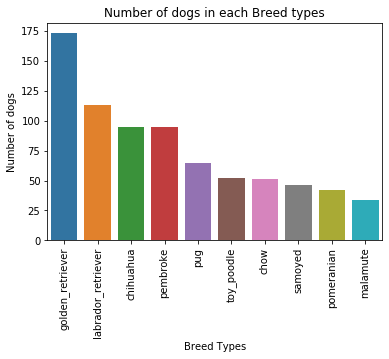

In [313]:
no_id_duplicated_df =  twitter_df[~twitter_df.tweet_id.duplicated()]
_ = sns.countplot(x = 'breed', data = no_id_duplicated_df,
                  order = no_id_duplicated_df.breed.value_counts()[:10].index)
plt.xlabel('Breed Types')
plt.ylabel('Number of dogs')
plt.title('Number of dogs in each Breed types')
plt.xticks(rotation = 90)
plt.show()

#### Most popularity dog types

In [314]:
popularity_breed = no_id_duplicated_df.groupby('breed')[['breed','retweet_count',
                                                      'favorite_count']].sum().reset_index()
popularity_breed.head()

,breed,retweet_count,favorite_count
0,afghan_hound,28651,51980
1,airedale,16725,63370
2,american_staffordshire_terrier,36973,150083
3,appenzeller,2916,14635
4,australian_terrier,6157,22255


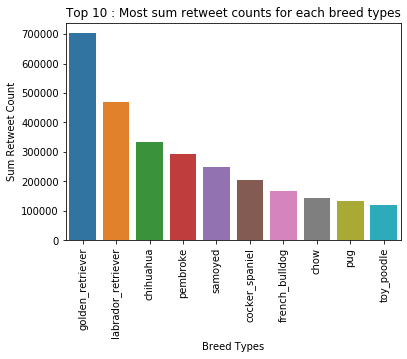

In [315]:
_ = sns.barplot(x = 'breed',y='retweet_count',
                data = popularity_breed.sort_values(by = 'retweet_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum Retweet Count')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum retweet counts for each breed types')
plt.show()

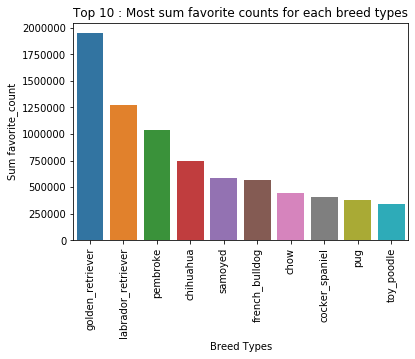

In [316]:
_ = sns.barplot(x = 'breed',y='favorite_count',
                data = popularity_breed.sort_values(by = 'favorite_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum favorite_count')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum favorite counts for each breed types')
plt.show()

#### Most popularity dog stages

In [317]:
popularity_stage = no_id_duplicated_df.groupby('dog_stage')[['dog_stage','retweet_count',
                                                      'favorite_count']].sum().reset_index()
popularity_stage.head()

,dog_stage,retweet_count,favorite_count
0,doggo,609925,1397263
1,floofer,34781,92442
2,pupper,518324,1461141
3,puppo,147923,474806


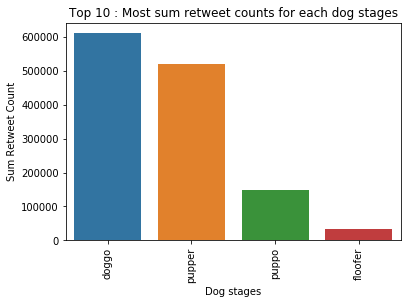

In [318]:
_ = sns.barplot(x = 'dog_stage',y='retweet_count',
                data = popularity_stage.sort_values(by = 'retweet_count',ascending = False))
plt.xlabel('Dog stages')
plt.ylabel('Sum Retweet Count')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum retweet counts for each dog stages')
plt.show()

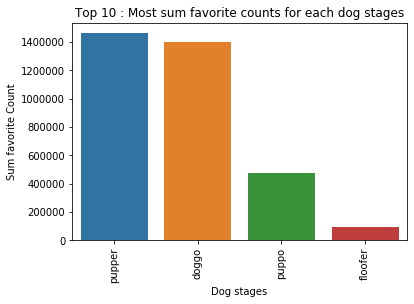

In [319]:
_ = sns.barplot(x = 'dog_stage',y='favorite_count',
                data = popularity_stage.sort_values(by = 'favorite_count',ascending = False))
plt.xlabel('Dog stages')
plt.ylabel('Sum favorite Count')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum favorite counts for each dog stages')
plt.show()

### Question 2 : Trends of Popularity breed types in each yaer

In [320]:
twitter_df['year'] = twitter_df['timestamp'].dt.year
twitter_df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf,year
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,1.4,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,2017


#### Year 2015

In [321]:
twitter_2015 = twitter_df.query('year == 2015')
twitter_2015.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf,year
247,682406705142087680,2015-12-31 03:43:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Patrick. He's a bigass pupper. 7/10 ht...,7,10,0.7,Patrick,pupper,2019,8319,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,NaN,NaN,2015
248,681891461017812993,2015-12-29 17:36:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,10,10,1.0,Charlie,pupper,951,2706,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,chihuahua,0.203570,2015
249,681694085539872773,2015-12-29 04:31:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,11,10,1.1,Bo,pupper,4581,14010,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,toy_poodle,0.920992,2015
250,681679526984871937,2015-12-29 03:33:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,7,10,0.7,NaN,pupper,499,1923,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,NaN,NaN,2015
251,681654059175129088,2015-12-29 01:52:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,12,10,1.2,Toffee,pupper,1045,2903,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,pomeranian,0.800538,2015


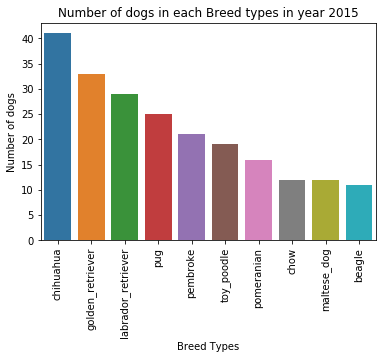

In [322]:
no_duplicated_2015 = twitter_2015[~twitter_2015.duplicated()]
_ = sns.countplot(x = 'breed', data = no_duplicated_2015,
                  order = no_duplicated_2015.breed.value_counts()[:10].index)
plt.xlabel('Breed Types')
plt.ylabel('Number of dogs')
plt.title('Number of dogs in each Breed types in year 2015')
plt.xticks(rotation = 90)
plt.show()

In [323]:
popularity_df_2015 = no_duplicated_2015.groupby('breed')[['breed','retweet_count',
                                                      'favorite_count']].sum().reset_index()
popularity_df_2015.head()

,breed,retweet_count,favorite_count
0,airedale,4226,10601
1,american_staffordshire_terrier,6015,11475
2,basenji,1259,3059
3,basset,3271,8663
4,beagle,11088,31481


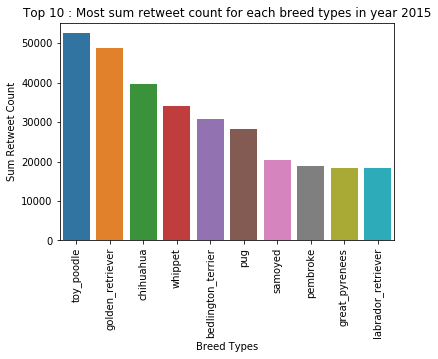

In [324]:
_ = sns.barplot(x = 'breed',y='retweet_count',
                data = popularity_df_2015.sort_values(by = 'retweet_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum Retweet Count')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum retweet count for each breed types in year 2015')
plt.show()

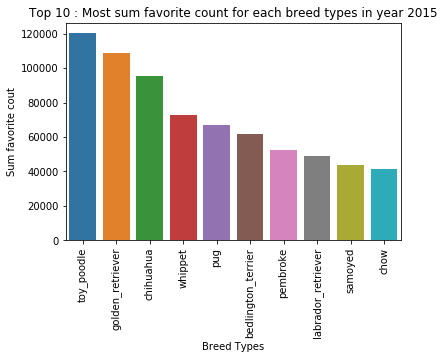

In [325]:
_ = sns.barplot(x = 'breed',y='favorite_count',
                data = popularity_df_2015.sort_values(by = 'favorite_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum favorite cout')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum favorite count for each breed types in year 2015')
plt.show()

#### Year 2016

In [326]:
twitter_2016 = twitter_df.query('year == 2016')
twitter_2016.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf,year
38,813910438903693312,2016-12-28 00:52:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,11,10,1.1,Chubbs,doggo,2194,10342,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,siberian_husky,0.699355,2016
39,813202720496779264,2016-12-26 02:00:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,11,10,1.1,NaN,doggo,2090,10192,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,cocker_spaniel,0.701852,2016
40,813127251579564032,2016-12-25 21:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's an anonymous doggo that appears to be v...,11,10,1.1,NaN,doggo,3652,13242,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,norwegian_elkhound,0.432416,2016
41,813096984823349248,2016-12-25 19:00:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,11,10,1.1,Rocky,doggo,4207,11694,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,great_dane,0.128056,2016
42,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,1.2,NaN,doggo,2525,9701,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,golden_retriever,0.426183,2016


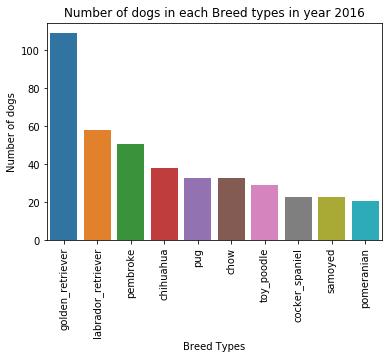

In [327]:
no_duplicated_2016 = twitter_2016[~twitter_2016.duplicated()]
_ = sns.countplot(x = 'breed', data = no_duplicated_2016,
                  order = no_duplicated_2016.breed.value_counts()[:10].index)
plt.xlabel('Breed Types')
plt.ylabel('Number of dogs')
plt.title('Number of dogs in each Breed types in year 2016')
plt.xticks(rotation = 90)
plt.show()

In [328]:
popularity_df_2016 = no_duplicated_2016.groupby('breed')[['breed','retweet_count',
                                                      'favorite_count']].sum().reset_index()
popularity_df_2016.head()

,breed,retweet_count,favorite_count
0,afghan_hound,12616,34675
1,airedale,7699,30733
2,american_staffordshire_terrier,12891,42402
3,appenzeller,758,2594
4,australian_terrier,700,2244


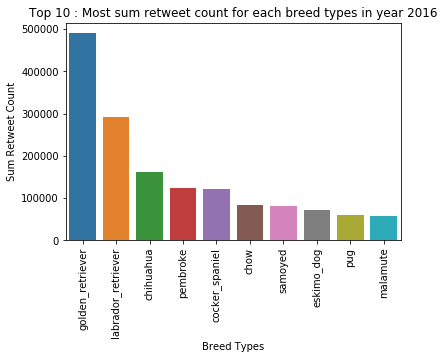

In [329]:
_ = sns.barplot(x = 'breed',y='retweet_count',
                data = popularity_df_2016.sort_values(by = 'retweet_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum Retweet Count')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum retweet count for each breed types in year 2016')
plt.show()

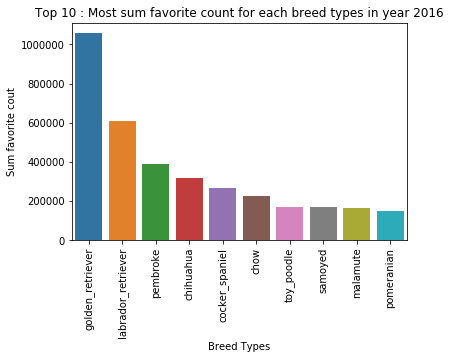

In [330]:
_ = sns.barplot(x = 'breed',y='favorite_count',
                data = popularity_df_2016.sort_values(by = 'favorite_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum favorite cout')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum favorite count for each breed types in year 2016')
plt.show()

#### Year 2017

In [331]:
twitter_2017 = twitter_df.query('year == 2017')
twitter_2017.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,rating,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf,year
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,1.4,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,2017
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,1.2,Yogi,doggo,3128,20771,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,german_shepherd,0.707046,2017
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,1.2,NaN,doggo,5669,28031,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,labrador_retriever,0.476913,2017
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,1.2,Napolean,doggo,3628,20730,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781,2017
4,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,1.2,Scout,doggo,3327,16476,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,chihuahua,0.955156,2017


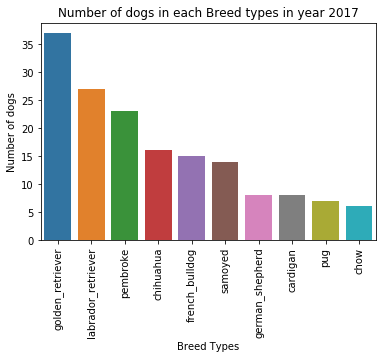

In [332]:
no_duplicated_2017 = twitter_2017[~twitter_2017.duplicated()]
_ = sns.countplot(x = 'breed', data = no_duplicated_2017,
                  order = no_duplicated_2017.breed.value_counts()[:10].index)
plt.xlabel('Breed Types')
plt.ylabel('Number of dogs')
plt.title('Number of dogs in each Breed types in year 2017')
plt.xticks(rotation = 90)
plt.show()

In [333]:
popularity_df_2017 = no_duplicated_2017.groupby('breed')[['breed','retweet_count',
                                                      'favorite_count']].sum().reset_index()
popularity_df_2017.head()

,breed,retweet_count,favorite_count
0,afghan_hound,16035,17305
1,airedale,4800,22036
2,american_staffordshire_terrier,18067,96206
3,appenzeller,2158,12041
4,australian_terrier,5457,20011


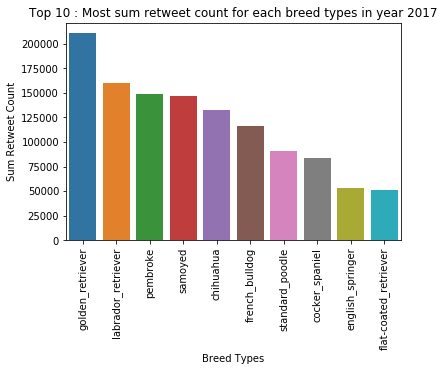

In [334]:
_ = sns.barplot(x = 'breed',y='retweet_count',
                data = popularity_df_2017.sort_values(by = 'retweet_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum Retweet Count')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum retweet count for each breed types in year 2017')
plt.show()

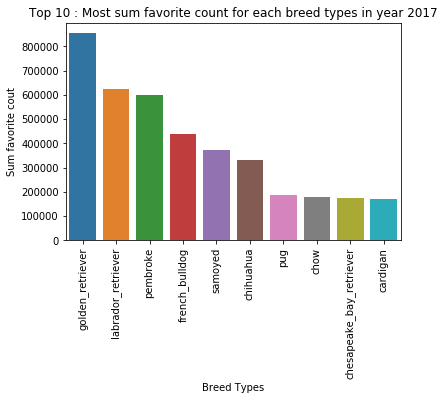

In [335]:
_ = sns.barplot(x = 'breed',y='favorite_count',
                data = popularity_df_2017.sort_values(by = 'favorite_count',ascending = False).head(10))
plt.xlabel('Breed Types')
plt.ylabel('Sum favorite cout')
plt.xticks(rotation = 90)
plt.title('Top 10 : Most sum favorite count for each breed types in year 2017')
plt.show()

In [336]:
popularity_2015_2016 = popularity_df_2015.merge(popularity_df_2016,left_on = 'breed',
                                            right_on = 'breed',
                                            suffixes = ('_2015','_2016'),how = 'outer')
popularity_2015_2016.head()

,breed,retweet_count_2015,favorite_count_2015,retweet_count_2016,favorite_count_2016
0,airedale,4226.0,10601.0,7699.0,30733.0
1,american_staffordshire_terrier,6015.0,11475.0,12891.0,42402.0
2,basenji,1259.0,3059.0,6752.0,19475.0
3,basset,3271.0,8663.0,18115.0,47848.0
4,beagle,11088.0,31481.0,18234.0,56678.0


In [337]:
popularity_2015_2017 = popularity_2015_2016.merge(popularity_df_2017,left_on = 'breed',
                                            right_on = 'breed',how = 'outer')
popularity_2015_2017.columns = ['breed','retweet_count_2015','favorite_count_2015',
                               'retweet_count_2016','favorite_count_2016',
                               'retweet_count_2017','favorite_count_2017']
popularity_2015_2017.head()

,breed,retweet_count_2015,favorite_count_2015,retweet_count_2016,favorite_count_2016,retweet_count_2017,favorite_count_2017
0,airedale,4226.0,10601.0,7699.0,30733.0,4800.0,22036.0
1,american_staffordshire_terrier,6015.0,11475.0,12891.0,42402.0,18067.0,96206.0
2,basenji,1259.0,3059.0,6752.0,19475.0,NaN,NaN
3,basset,3271.0,8663.0,18115.0,47848.0,28177.0,143444.0
4,beagle,11088.0,31481.0,18234.0,56678.0,NaN,NaN


In [338]:
popularity_2015_2017 = popularity_2015_2017.fillna(0)
popularity_2015_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                113 non-null    object 
 1   retweet_count_2015   113 non-null    float64
 2   favorite_count_2015  113 non-null    float64
 3   retweet_count_2016   113 non-null    float64
 4   favorite_count_2016  113 non-null    float64
 5   retweet_count_2017   113 non-null    float64
 6   favorite_count_2017  113 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.1+ KB


In [339]:
popularity_2015_2017['diff_retweet_2016_2015'] = popularity_2015_2017['retweet_count_2016']\
- popularity_2015_2017['retweet_count_2015']

popularity_2015_2017['diff_retweet_2017_2016'] = popularity_2015_2017['retweet_count_2017']\
- popularity_2015_2017['retweet_count_2016']

popularity_2015_2017['diff_fav_2016_2015'] = popularity_2015_2017['favorite_count_2016']\
- popularity_2015_2017['favorite_count_2015']

popularity_2015_2017['diff_fav_2017_2016'] = popularity_2015_2017['favorite_count_2017']\
- popularity_2015_2017['favorite_count_2016']

popularity_2015_2017['diff_retweet_2017_2015'] = popularity_2015_2017['retweet_count_2017']\
- popularity_2015_2017['retweet_count_2015']

popularity_2015_2017['diff_fav_2017_2015'] = popularity_2015_2017['favorite_count_2017']\
- popularity_2015_2017['favorite_count_2015']
popularity_2015_2017.head()

,breed,retweet_count_2015,favorite_count_2015,retweet_count_2016,favorite_count_2016,retweet_count_2017,favorite_count_2017,diff_retweet_2016_2015,diff_retweet_2017_2016,diff_fav_2016_2015,diff_fav_2017_2016,diff_retweet_2017_2015,diff_fav_2017_2015
0,airedale,4226.0,10601.0,7699.0,30733.0,4800.0,22036.0,3473.0,-2899.0,20132.0,-8697.0,574.0,11435.0
1,american_staffordshire_terrier,6015.0,11475.0,12891.0,42402.0,18067.0,96206.0,6876.0,5176.0,30927.0,53804.0,12052.0,84731.0
2,basenji,1259.0,3059.0,6752.0,19475.0,0.0,0.0,5493.0,-6752.0,16416.0,-19475.0,-1259.0,-3059.0
3,basset,3271.0,8663.0,18115.0,47848.0,28177.0,143444.0,14844.0,10062.0,39185.0,95596.0,24906.0,134781.0
4,beagle,11088.0,31481.0,18234.0,56678.0,0.0,0.0,7146.0,-18234.0,25197.0,-56678.0,-11088.0,-31481.0


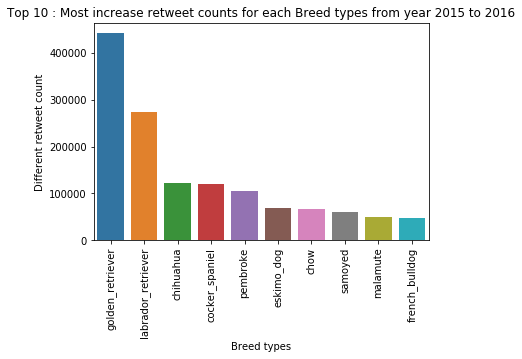

In [340]:
_ = sns.barplot(x = 'breed',y = 'diff_retweet_2016_2015', 
                data =popularity_2015_2017.sort_values(by = 'diff_retweet_2016_2015',ascending = False).head(10))
plt.xlabel('Breed types')
plt.ylabel('Different retweet count')
plt.title('Top 10 : Most increase retweet counts for each Breed types from year 2015 to 2016')
plt.xticks(rotation = 90)
plt.show()

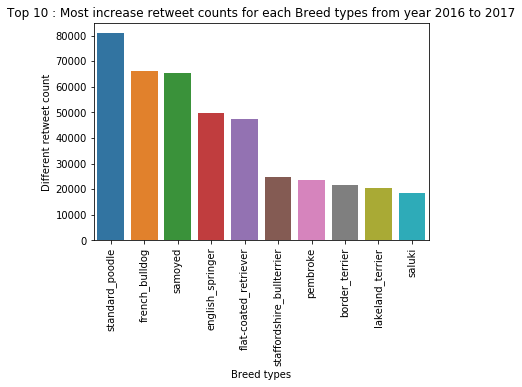

In [341]:
_ = sns.barplot(x = 'breed',y = 'diff_retweet_2017_2016', 
                data =popularity_2015_2017.sort_values(by = 'diff_retweet_2017_2016',ascending = False).head(10))
plt.xlabel('Breed types')
plt.ylabel('Different retweet count')
plt.title('Top 10 : Most increase retweet counts for each Breed types from year 2016 to 2017')
plt.xticks(rotation = 90)
plt.show()

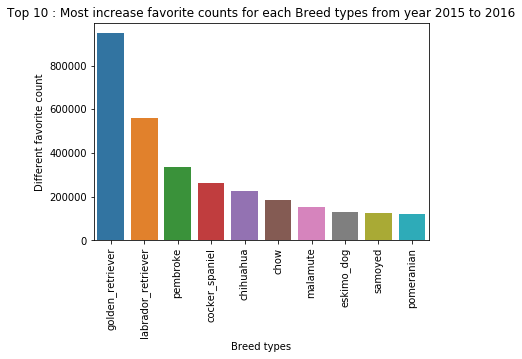

In [342]:
_ = sns.barplot(x = 'breed',y = 'diff_fav_2016_2015', 
                data =popularity_2015_2017.sort_values(by = 'diff_fav_2016_2015',ascending = False).head(10))
plt.xlabel('Breed types')
plt.ylabel('Different favorite count')
plt.title('Top 10 : Most increase favorite counts for each Breed types from year 2015 to 2016')
plt.xticks(rotation = 90)
plt.show()

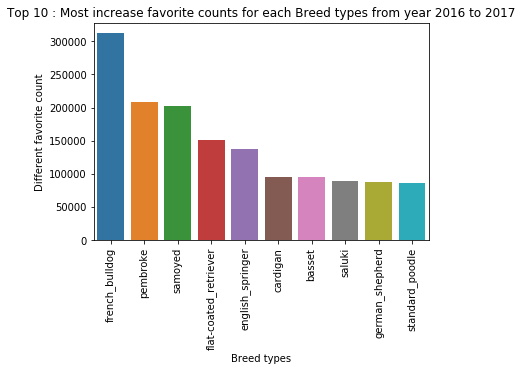

In [343]:
_ = sns.barplot(x = 'breed',y = 'diff_fav_2017_2016', 
                data =popularity_2015_2017.sort_values(by = 'diff_fav_2017_2016',ascending = False).head(10))
plt.xlabel('Breed types')
plt.ylabel('Different favorite count')
plt.title('Top 10 : Most increase favorite counts for each Breed types from year 2016 to 2017')
plt.xticks(rotation = 90)
plt.show()

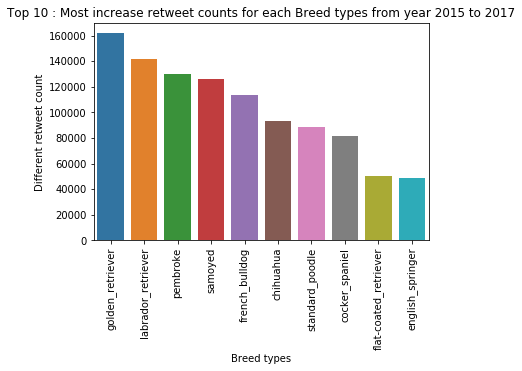

In [344]:
_ = sns.barplot(x = 'breed',y = 'diff_retweet_2017_2015', 
                data =popularity_2015_2017.sort_values(by = 'diff_retweet_2017_2015',ascending = False).head(10))
plt.xlabel('Breed types')
plt.ylabel('Different retweet count')
plt.title('Top 10 : Most increase retweet counts for each Breed types from year 2015 to 2017')
plt.xticks(rotation = 90)
plt.show()

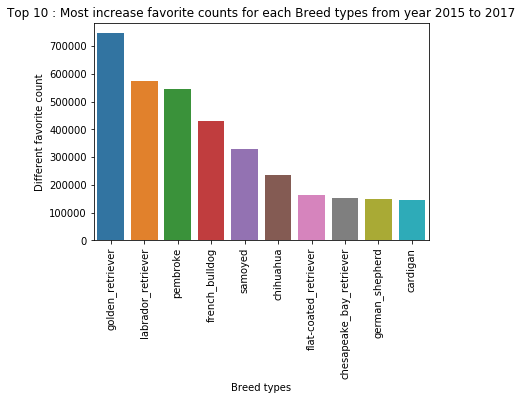

In [345]:
_ = sns.barplot(x = 'breed',y = 'diff_fav_2017_2015', 
                data =popularity_2015_2017.sort_values(by = 'diff_fav_2017_2015',ascending = False).head(10))
plt.xlabel('Breed types')
plt.ylabel('Different favorite count')
plt.title('Top 10 : Most increase favorite counts for each Breed types from year 2015 to 2017')
plt.xticks(rotation = 90)
plt.show()

### Question 3 : The lowest confident to predict the breed types

In [346]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   int64              
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating_numerator    2086 non-null   int64              
 5   rating_denominator  2086 non-null   int64              
 6   rating              2086 non-null   float64            
 7   name                1502 non-null   object             
 8   dog_stage           333 non-null    object             
 9   retweet_count       2086 non-null   int64              
 10  favorite_count      2086 non-null   int64              
 11  jpg_url             2086 non-null   object             
 12  breed               1762 non-null 

In [347]:
conf_df = twitter_df[twitter_df.breed.notnull()].groupby('breed')['conf'].mean()\
.reset_index()
conf_df.head()

,breed,conf
0,afghan_hound,0.394129
1,airedale,0.583771
2,american_staffordshire_terrier,0.527359
3,appenzeller,0.503665
4,australian_terrier,0.307584


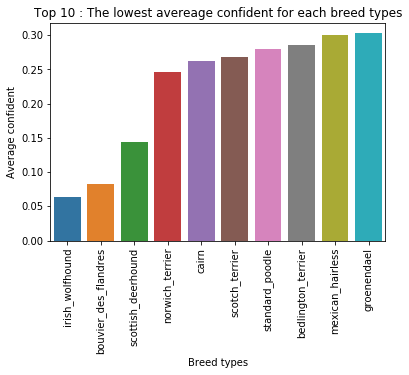

In [348]:
_ = sns.barplot(x = 'breed',y = 'conf',data = conf_df.sort_values('conf',ascending = True).head(10))
plt.xlabel('Breed types')
plt.ylabel('Average confident')
plt.title('Top 10 : The lowest avereage confident for each breed types')
plt.xticks(rotation = 90)
plt.show()

In [349]:
len(conf_df.query('conf < 0.5'))

59

In [350]:
len(conf_df)

113